In [1]:
# connect to drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# changing directory
%cd "/content/drive/MyDrive/sem_7/wn_assignment4/WN_tute/"

/content/drive/.shortcut-targets-by-id/14x8-lyktG7pfZl8YRVzg6leqWxW72b4v/WN_tute


In [3]:
!ls

assignment.ipynb  best_atten_400nodes.hdf5  rawcsi  Readme.gdoc  requirement.gdoc  requirement.txt


In [4]:
!pip install hampel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hampel: filename=hampel-1.0.2-cp310-cp310-linux_x86_64.whl size=209422 sha256=085b096f5050eb5145f63c3676db9b17d4106851e49e9b8d8f2272e313aa0630
  Stored in directory: /root/.cache/pip/wheels/0e/c3/3c/8a9f55c3de0b09faf919393d4c6f09b11b7421dcaa7243b820
Successfully built hampel


In [4]:
#  install required.txt
!python -m pip install -r "/content/drive/MyDrive/sem_7/wn_assignment4/requirement.txt"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 31.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# !pip install pandas==1.3.5

In [5]:
import pandas as pd
import numpy as np
from math import sqrt, atan2
import pywt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.signal as signal
from hampel import hampel
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
import math
import difflib
import collections

In [6]:
path ="/content/drive/MyDrive/sem_7/wn_assignment4/WN_tute/rawcsi/mayank_ISA.csv"
path1 ="/content/drive/MyDrive/sem_7/wn_assignment4/WN_tute/rawcsi/mayank_relation.csv"

In [7]:
!ls

assignment.ipynb  best_atten_400nodes.hdf5  rawcsi  Readme.gdoc  requirement.gdoc  requirement.txt


In [8]:
# read the input CSI file.
def fine_csv(path):
    df = pd.read_csv(path, sep=",", header=0)
    index_names = df[df['mac'] != 'C4:4F:33:7B:83:7E'].index
    df.drop(index_names, inplace = True)
    df = df.dropna()
    # reset the index
    df = df.reset_index(drop=True)
    print("fine_csv completed")
    return df

In [9]:
csi_data = fine_csv(path)
csi_data1 = fine_csv(path1)

fine_csv completed
fine_csv completed


In [10]:
# prepare matrix from the raw data.
def prepare_matrix(CSI_DATA):
    #df = pd.DataFrame()
    csi_matrix=[]
    for i in range(0, len(CSI_DATA)):
        csi_split =CSI_DATA[i]
        csi_split = csi_split = csi_split[1:-1]
        csi_raw = [int(x) for x in csi_split.split(" ") if x != '']
        csi_matrix.append(csi_raw)
    df = pd.DataFrame(csi_matrix)
    print("prepare_matrix completed")
    return df

In [11]:
def prepare_csi(df):
    df['rssi'] = pd.to_numeric(df['rssi'])
    df['timestamp'] = pd.to_numeric(df['timestamp'])
    CSI_DATA = np.array(df.CSI_DATA)
    RSSI = np.array(df.rssi)
    time = np.array(df.timestamp)
    csi_matrix = prepare_matrix(CSI_DATA)

    csi_matrix = csi_matrix.reset_index(drop=True)
    time = pd.DataFrame(time)
    time.columns = ['time']

    RSSI = pd.DataFrame(RSSI)
    RSSI.columns = ['rssi']

    print("prepare_csi completed")
    return csi_matrix, time, RSSI
# use name "time" varible in the function calling.

use the "time" variable for storing the timestamp values

In [12]:
csi_data, time, RSSI = prepare_csi(csi_data)
csi_data1, time1, RSSI1 = prepare_csi(csi_data1)

prepare_matrix completed
prepare_csi completed
prepare_matrix completed
prepare_csi completed


In [13]:
# remove Nan values from the csi matrix.
def remove_nan(matrix_, time_, rssi_):
    temp = pd.concat([matrix_,time_,rssi_], axis=1)
    temp = temp.dropna()
    temp = temp.reset_index(drop=True)
    time = pd.DataFrame(temp.time.values)
    rssi = pd.DataFrame(temp.rssi.values)
    print(time.shape[0] )
    matrix = temp.drop(['time', 'rssi'], axis=1)
    print("remove_nan completed")
    return  matrix , time, rssi

In [14]:
# call here
csi_matrix, time, RSSI = remove_nan(csi_data, time, RSSI)
csi_matrix1, time1, RSSI1 = remove_nan(csi_data1, time1, RSSI1)

25767
remove_nan completed
41595
remove_nan completed


In [15]:
# code to find the amplitude and phase of every subscarrier
def amp_phase(df):
    from math import sqrt, atan2
    amp = []

    d = np.array(df)
    for j in range(len(d)):
        imaginary = []
        real = []
        amplitudes = []

        for i in range(len(d[j])):
            if i % 2 == 0:
                imaginary.append(d[j][i])
            else:
                real.append(d[j][i])
        for i in range(int(len(d[0]) / 2)):
            #write code here.
            amplitudes.append(sqrt(real[i] ** 2 + imaginary[i] ** 2))

        amp.append(amplitudes)

    amp = pd.DataFrame(amp)
    amp = amp.reset_index(drop=True)

    print("amp_phase completed")

    return amp


In [16]:
# Call Here
Train_amp = amp_phase(csi_matrix)
Train_amp1 = amp_phase(csi_matrix1)

amp_phase completed
amp_phase completed


In [17]:
def drop_subcarrier(df):
    df = df.iloc[0:,64:]
    df.columns = range(df.shape[1])
    delete_idxs =  np.asarray([0,1,2,3,4,5,63,64,65,123,124,125,126,127])

    df = df.drop(delete_idxs, axis=1)
    df.columns = range(df.shape[1])
    print("drop_subcarrier completed")
    return df

In [18]:
# Call Here
train_amp = drop_subcarrier(Train_amp)
train_amp1 = drop_subcarrier(Train_amp1)

drop_subcarrier completed
drop_subcarrier completed


In [18]:
def Norm(amp):
    norm_amp=(amp-amp.min())/(amp.max()-amp.min()) # normalize amplitude

    norm_amp = pd.DataFrame(norm_amp)

    print("Norm completed")
    return norm_amp

In [19]:
# Call; here
norm_amp = Norm(train_amp)
norm_amp1 = Norm(train_amp1)

Norm completed
Norm completed


In [19]:
# Write code to display the line curve for computed amplitude.
#  change whole function to deplag
def line_curve(norm_amp):
  signalTime = np.arange(2000,2000,1)
  f = plt.figure(1)
  plt.figure(figsize=(20,3))
  length = len(signalTime)
  plt.plot(norm_amp[41],label="Amplitude")
  plt.legend()
  plt.xlabel("CSI value")
  plt.ylabel("Amplitude")
  plt.xlim(0,31)
  plt.xticks(np.arange(0,1373,step=30))
  plt.grid()
  f.show()


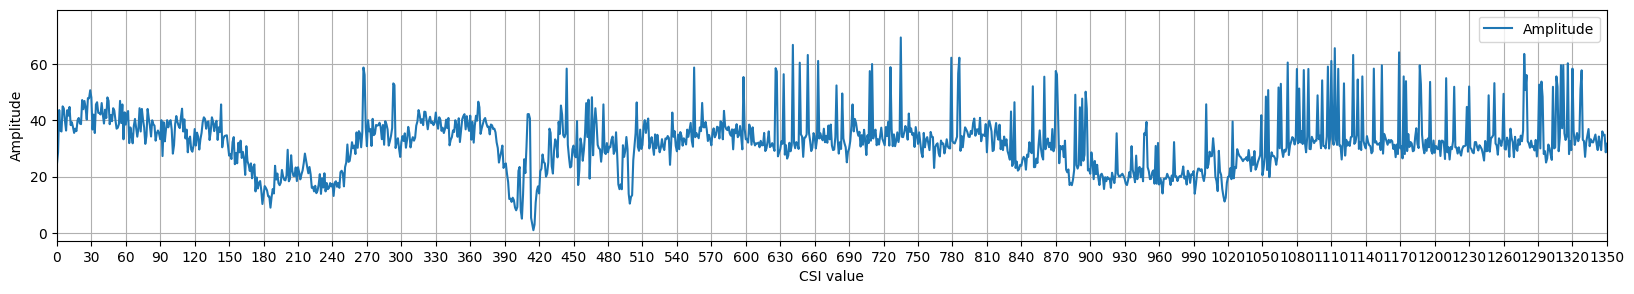

<Figure size 640x480 with 0 Axes>

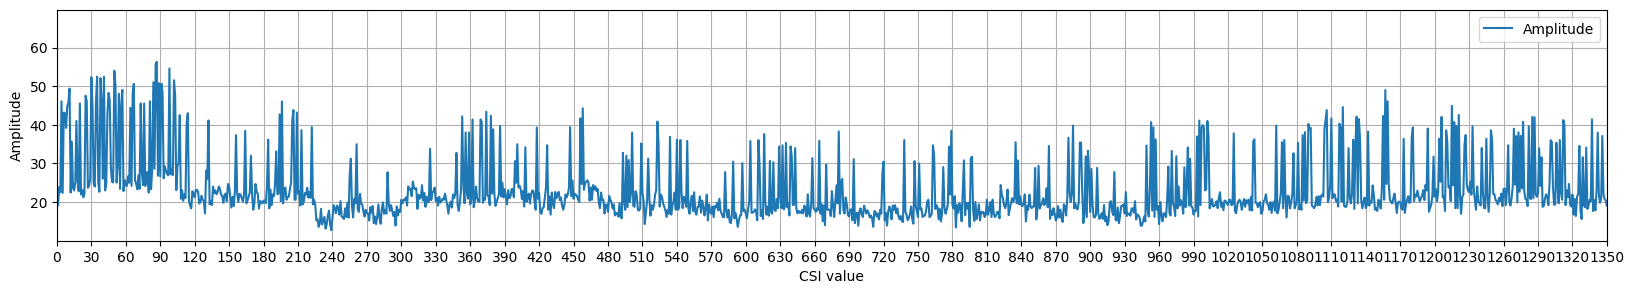

In [20]:
line_curve(train_amp)
line_curve(train_amp1)

<Figure size 640x480 with 0 Axes>

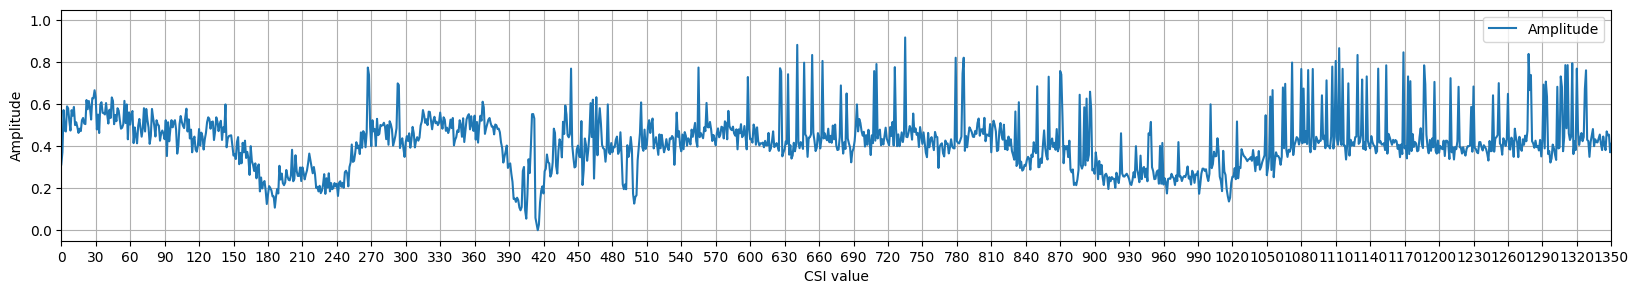

In [21]:
# call here
line_curve(norm_amp)

<Figure size 640x480 with 0 Axes>

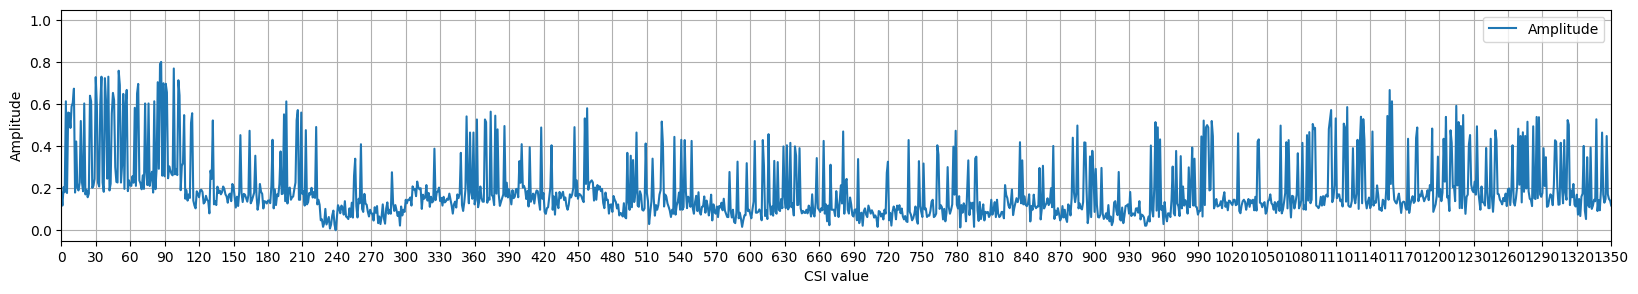

In [22]:
line_curve(norm_amp1)

In [23]:
# outlier removal in amplitude
def hampel_filter(df):
        fine_df = df.copy()
        length = len(fine_df)
        length = int(length/1)
        length = int(length)
        print(length)
        for i in fine_df.columns:#range(len(df_amp.iloc[0]))
            temp = hampel(df[i], window_size=length) # find the optimal window_size
            fine_df[i]=temp.filtered_data
        print("hample_filter completed")
        return fine_df

In [24]:
# call Here
fine_df = hampel_filter(norm_amp)
fine_df1 = hampel_filter(norm_amp1)

25767
hample_filter completed
41595
hample_filter completed


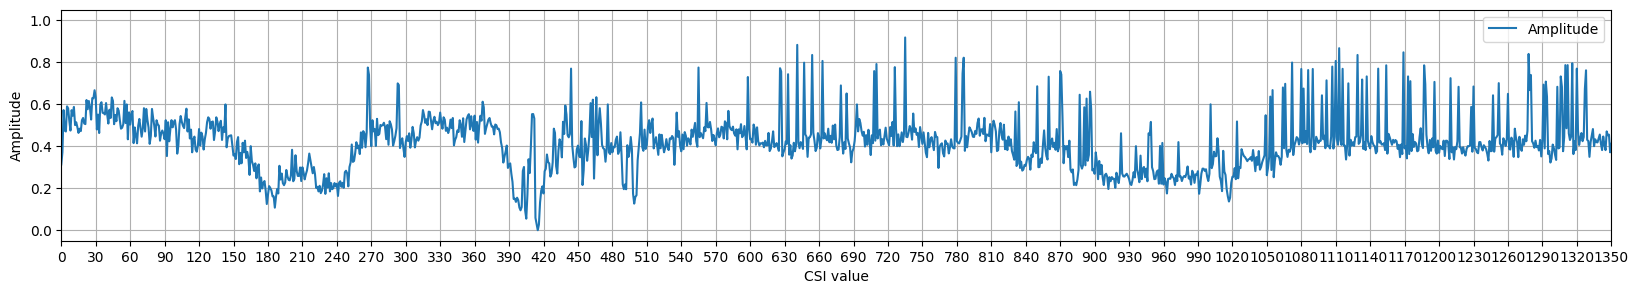

<Figure size 640x480 with 0 Axes>

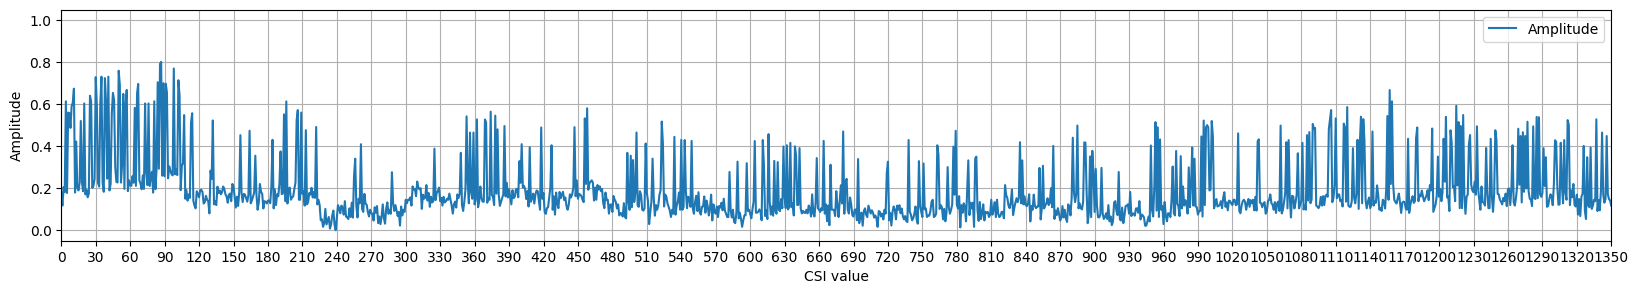

In [49]:
line_curve(fine_df)
line_curve(fine_df1)

In [25]:
def denoise(df):
    dwt = pd.DataFrame()

    for i in range(len(df.iloc[0])):
        signal = df[i]
        coeff = pywt.wavedec(signal, wavelet='db4', mode="per")
        #coeff
        d = np.mean(np.absolute(coeff[-1] - np.mean(coeff[-1], axis=None)), axis=None)
        sigma = (1/0.6475) * d
        #sigma
        uthresh = sigma * np.sqrt(2 * np.log(len(signal)))
        #uthresh
        coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
        filter = pywt.waverec(coeff, wavelet='db4', mode='per')
        #filter1 = pd.DataFrame(filter)
        dwt[i]= filter
    dwt = dwt[:-1]
    print("denoise completed")
    return dwt

In [26]:
# Call Here
denoise_df = denoise(fine_df)
denoise_df1 = denoise(fine_df1)

denoise completed
denoise completed


<Figure size 640x480 with 0 Axes>

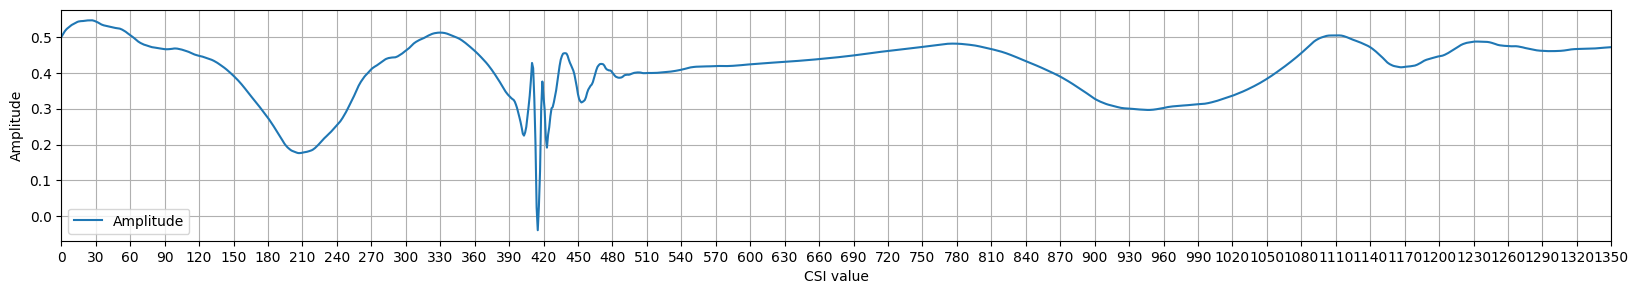

In [27]:
# Write code to display the line curve for computed amplitude.
line_curve(denoise_df)

<Figure size 640x480 with 0 Axes>

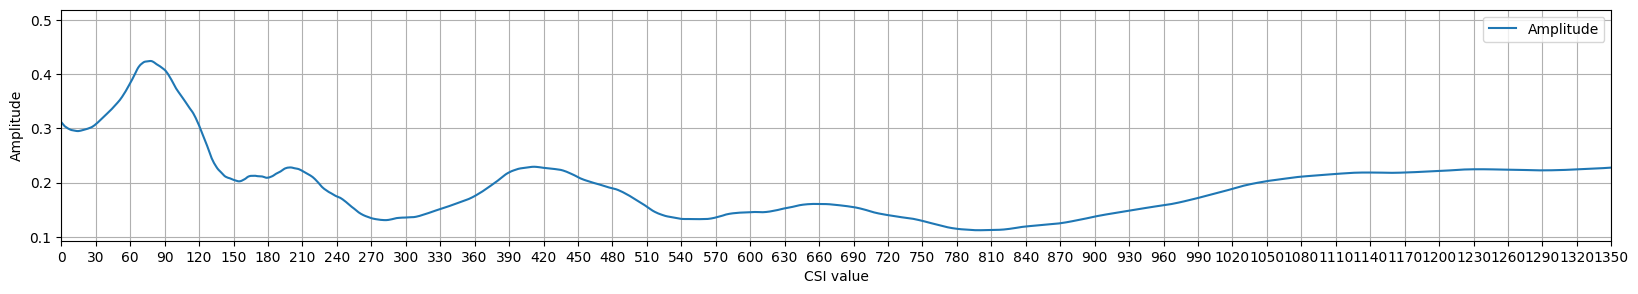

In [28]:
line_curve(denoise_df1)

In [29]:
# convert timestamp into minute and seconds
def convert_time(data):
    from datetime import datetime
    d = data.copy()
    #df = d["timestamp"]
    time = pd.DataFrame(d)
    for i in range(0, len(time)):
        dt_obj = datetime.fromtimestamp(int(time[0][i]))
        temp = "%s.%s" % (str(dt_obj.minute).zfill(2),str(dt_obj.second).zfill(2))
        time.loc[i] = float(temp)
        #time.loc[i] = temp
    print("convert time completed")
    return time

In [30]:
# Call here
timestamp = convert_time(time)
timestamp1 = convert_time(time1)

convert time completed
convert time completed


In [31]:
 # apply savgol fiter
def savgol(df,train_time ):
    rd_data = []

    N_sample = len(df[0])
    print(N_sample)
    time1 = np.array(train_time)
    time1 = np.unique(time1)
    print(time1.shape[0])
    sam_rate = N_sample+1/time1.shape[0]
    print(sam_rate)
    for i in range(0, len(df.loc[0])):
        rd_ph1 = signal.savgol_filter(df[i], 51,5)
        sos = signal.butter(10,20,'low', fs=2*sam_rate, output='sos')
        rd_ph1 = signal.sosfiltfilt(sos,rd_ph1)
        rd_data.append(rd_ph1)
    smooth = pd.DataFrame(rd_data)
    smooth = smooth.transpose()
    print("savgol filter completed")
    return smooth

In [32]:
# Call Here
final_df = savgol(denoise_df,timestamp)
final_df1 = savgol(denoise_df1,timestamp1)

25767
534
25767.001872659177
savgol filter completed
41595
846
41595.0011820331
savgol filter completed


<Figure size 640x480 with 0 Axes>

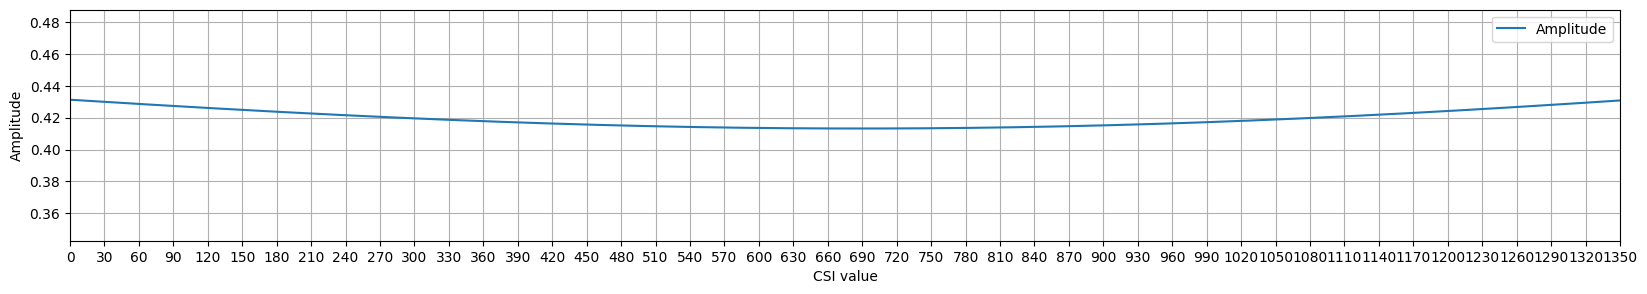

In [33]:
# Write code to display the line curve for computed savgol.
line_curve(final_df)

<Figure size 640x480 with 0 Axes>

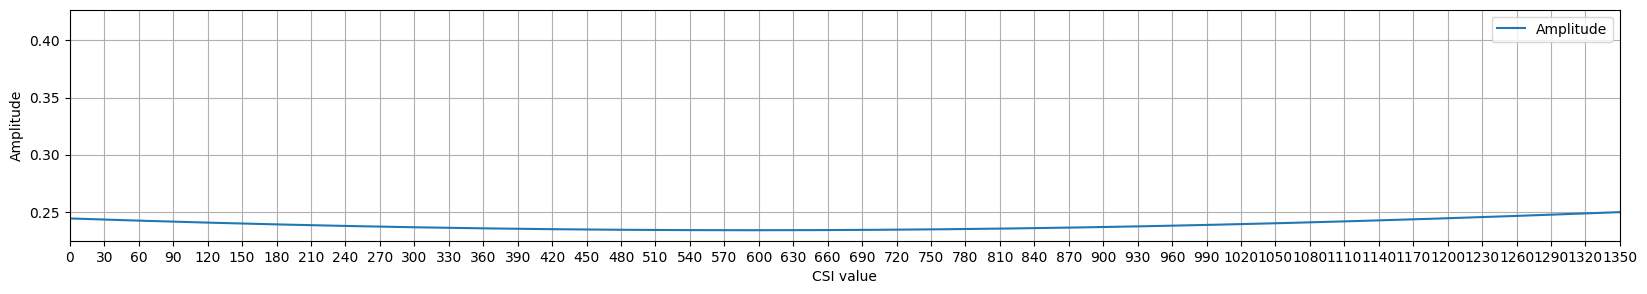

In [34]:
line_curve(final_df1)

In [ ]:
# Make input shape as:
# First reduce the column dimension to 100
# Then make reshape to 10 X 10.

In [35]:
print(final_df.shape)
print(final_df1.shape)

(25767, 114)
(41595, 114)


In [37]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

y_default = [1] * len(final_df)
y_default1 = [1] * len(final_df1)

def select_features(X, y):
    X_new = SelectKBest(f_classif, k=100).fit_transform(X,y)
    print(X_new.shape)
    return X_new
# not  givng good reuslt

In [36]:
# taking random 100 of my choice
X_new = final_df.iloc[:, 6:106]
print(X_new.shape)
# taking first 100 bcz after many experiemnt found first 100 gives better result
X_new1 = final_df1.iloc[:, :100]
print(X_new1.shape)

(25767, 100)
(41595, 100)


In [38]:
# X_new = select_features(final_df, y_default)
# X_new1 = select_features(final_df1, y_default1)

(25767, 100)
(41595, 100)


In [37]:
print(X_new.shape)
print(X_new1.shape)


(25767, 100)
(41595, 100)


(25767, 114)


In [38]:
#reshape the dataset to 10 X 10
X_new = X_new.values.reshape(-1, 10, 10)

print(X_new.shape)


(25767, 10, 10)


In [39]:
# X_new1 = np.reshape(X_new1, (len(final_df1), 10, 10))
X_new1 = X_new1.values.reshape(-1, 10, 10)
print(X_new1.shape)

(41595, 10, 10)


In [40]:
# defining Attention layer.
class AttenLayer(tf.keras.layers.Layer):

    def __init__(self, num_state, **kw):
        super(AttenLayer, self).__init__(**kw)
        self.num_state = num_state

    def build(self, input_shape):
        self.kernel = self.add_weight('kernel', shape=[input_shape[-1], self.num_state])
        self.bias = self.add_weight('bias', shape=[self.num_state])
        self.prob_kernel = self.add_weight('prob_kernel', shape=[self.num_state])

    def call(self, input_tensor):
        atten_state = tf.tanh(tf.tensordot(input_tensor, self.kernel, axes=1) + self.bias)
        logits = tf.tensordot(atten_state, self.prob_kernel, axes=1)
        prob = tf.nn.softmax(logits)
        weighted_feature = tf.reduce_sum(tf.multiply(input_tensor, tf.expand_dims(prob, -1)), axis=1)
        return weighted_feature

    # for saving the model
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'num_state': self.num_state,})
        return config

In [41]:
# defining Bi-lstm with Attention Layer model
class CSIModelConfig:
    def __init__(self, win_len=1000, step=200, thrshd=0.6, downsample=2):
        pass

    def build_model(self, n_unit_lstm=200, n_unit_atten=400):
        """
        Returns the Tensorflow Model which uses AttenLayer
        """
        if self._downsample > 1:
            length = len(np.ones((self._win_len,))[::self._downsample])
            x_in = tf.keras.Input(shape=(length, 10))
        else:
            x_in = tf.keras.Input(shape=(self._win_len, 10))
        x_tensor = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=n_unit_lstm, return_sequences=True))(x_in)
        x_tensor = AttenLayer(n_unit_atten)(x_tensor)
        pred = tf.keras.layers.Dense(len(self._labels), activation='softmax')(x_tensor)
        model = tf.keras.Model(inputs=x_in, outputs=pred)
        return model


    @staticmethod
    def load_model(hdf5path):
        """
        Returns the Tensorflow Model for AttenLayer
        Args:
            hdf5path: str, the model file path
        """
        model = tf.keras.models.load_model(hdf5path, custom_objects={'AttenLayer':AttenLayer})
        return model

In [42]:
pathtomodel = '/content/drive/MyDrive/sem_7/wn_assignment4/WN_tute/best_atten_400nodes.hdf5'

In [43]:
#loading pretrained model
model = tf.keras.models.load_model(pathtomodel,custom_objects={'AttenLayer':AttenLayer})
# input shape reuired by the model is 10 X 10.

In [44]:
# predict here
def predict(X_new):
  y_pred= model.predict(X_new)
  t1= np.argmax(y_pred, axis=1)
  t1 = pd.DataFrame(t1)
  t1.columns=['headlabel']
  t1.headlabel.replace((0, 1,2, 3,4,5,6),('Forward', 'Looking Up', 'Nodding', 'Looking Down', 'Shaking','Looking Left', 'Looking Right'), inplace=True)
  return t1

t1=predict(X_new)
t2=predict(X_new1)


1300/1300 [==============================] - 94s 72ms/step


In [45]:
print(t1.shape)
print(t2.shape)

(25767, 1)
(41595, 1)


In [46]:
# Engagement score calculations
def calc_score(seq):
        score=0
        for i in seq:
            if(i==1 or i==2 or i==3):
                score+=1
            elif(i==6 or i==7 or i==5):
                score-=1
            elif(i==4):
                score+=0.8
            elif(i==8):
                score-=1
            # else:
            #     score+=0.5
        return score/len(seq)
def engagement_score(time, t1):
    headlabel_rank={'Forward':1, 'Nodding':2, 'Shaking':3, 'Looking Down':4, 'Looking Up':5, 'Looking Left':6, 'Looking Right':7, 'Unknown Gesture':8}
    time.columns= ['timestamp']
    end_time=time['timestamp'][time.shape[0]-1]
    start_time=time['timestamp'][0]
    total_time=end_time-start_time
    windows=total_time/10
    windows=math.floor(windows)

    window_size=(time.shape[0]+1)/windows
    window_size=math.floor(window_size)
    headlabels=[]

    for label in t1['headlabel']:
        headlabels.append(headlabel_rank[label])
    Windows=[]
    index=0
    for i in range(windows):
        Window=[]
        for j in range(window_size):
            try:
                Window.append(headlabels[index])
                index=index+1
            except:
                print("")
        Windows.append(Window)
    Windows_index=collections.deque()
    for i in range(len(Windows)):
        Windows_index.append(i)

    Clusters=[]

    while(len(Windows_index)>0):

        Cluster=[]
        first_index=Windows_index.popleft()
        Window=Windows[first_index]
        Cluster.append((first_index,Window))
        indexes=[]
        for index in Windows_index:
            sm=difflib.SequenceMatcher(None,Window,Windows[index])
            if(sm.ratio()>0.70): # similarity score
                indexes.append(index)
                Cluster.append((index,Windows[index]))
        for index in indexes:
            Windows_index.remove(index)
        Clusters.append(Cluster)
    scores=[0]*windows
    for cluster in Clusters:
        temp_score=[]
        for j in cluster:
            seq_score=calc_score(j[1])
            temp_score.append(seq_score)
        #sequence=cluster[0][1]
        #score=calc_score(sequence)
        score=max(temp_score)
        for seq in cluster:
            index=seq[0]
            scores[index]=score
    thresholds=[0.20,0.45,0.55,0.6,0.75,0.8]

    model_eng=[]
    window=[]
    for threshold in thresholds:
        win=0
        engaged=[]
        print("threshold: ",threshold)
        for i in scores:
            if(i>=threshold): # threshold for enumerating engage or disengage.
                engaged.append(1)
                model_eng.append(1)
                win=win+1
                window.append(win)
            else:
                engaged.append(0)
                model_eng.append(0)
                win=win+1
                window.append(win)
        print(sum(engaged)/len(engaged))

In [47]:
# call Here
engagement_score(time, t1)

threshold:  0.2
0.6792452830188679
threshold:  0.45
0.6415094339622641
threshold:  0.55
0.6037735849056604
threshold:  0.6
0.5849056603773585
threshold:  0.75
0.5283018867924528
threshold:  0.8
0.5283018867924528


In [48]:
engagement_score(time1, t2)

threshold:  0.2
0.9404761904761905
threshold:  0.45
0.9166666666666666
threshold:  0.55
0.9166666666666666
threshold:  0.6
0.9166666666666666
threshold:  0.75
0.8928571428571429
threshold:  0.8
0.8928571428571429
